# Import libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Preprocess data

In [70]:
action_video_games = pd.read_csv('imdb_video_games.csv')

In [71]:
action_video_games

,Popularity,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Director,Stars,Certificate
0,0,Baldur's Gate III,"Action, Adventure, Fantasy",9.8,"1,130",NaN,2023.0,Return to the Faerun in a tale of fellowship a...,"Swen Vincke,","Amelia Tyler, Neil Newbon, Jennifer English, D...",M
1,1,Starfield,"Action, Adventure, Drama",8.7,524,NaN,2023.0,"Set 300 years in the future, the player will a...","Todd Howard,","Sumalee Montano, Damien C. Haas, Barry Wiggins...",M
2,2,Red Dead Redemption II,"Action, Adventure, Crime",9.7,"47,844",NaN,2018.0,Amidst the decline of the Wild West at the tur...,NaN,"Benjamin Byron Davis, Roger Clark, Rob Wiethof...",M
3,3,Armored Core VI: Fires of Rubicon,"Action, Adventure, Sci-Fi",7.9,114,NaN,2023.0,Fifty years after a cataclysm caused by a subs...,"Masaru Yamamura, Kenneth Kin Yue Chan, Hidetak...","Fairouz Ai, Takayuki Sakazume, Megumi Han, Aya...",T
4,4,The Quarry,"Action, Adventure, Drama",8.0,"4,625",NaN,2022.0,When the sun goes down on the last night of su...,"Will Byles,","Siobhan Williams, Skyler Gisondo, Ted Raimi, G...",M
...,...,...,...,...,...,...,...,...,...,...,...
14677,14677,Aether Gazer,Action,NaN,NaN,NaN,2022.0,"In the future, constant war has eroded the liv...",NaN,"Sara Alexander, Emma Ballantine, Chase Brown, ...",NaN
14678,14678,Sniper: Path of Vengeance,"Action, Adventure, Crime",NaN,NaN,NaN,2002.0,"Somewhere in a dark, and evil city, crime and ...",NaN,NaN,M
14679,14679,Jimbaori: The Onin War,"Action, Adventure",NaN,NaN,NaN,2023.0,Set in feudal Japan during the late 16th centu...,NaN,Gilson B. Pontes,E10+
14680,14680,Seven Kingdoms II: The Fryhtan Wars,"Action, Adventure, Fantasy",NaN,NaN,NaN,1999.0,"Welcome to the world of Seven Kingdoms II, a w...",NaN,NaN,T


In [72]:
sum(action_video_games['Runtime'].isna())
# almost all the dataset is missing Runtime!

14581

In [73]:
# let's drop this column
action_video_games.drop('Runtime', axis=1, inplace=True)
action_video_games

,Popularity,Title,Genre,User Rating,Number of Votes,Year,Summary,Director,Stars,Certificate
0,0,Baldur's Gate III,"Action, Adventure, Fantasy",9.8,"1,130",2023.0,Return to the Faerun in a tale of fellowship a...,"Swen Vincke,","Amelia Tyler, Neil Newbon, Jennifer English, D...",M
1,1,Starfield,"Action, Adventure, Drama",8.7,524,2023.0,"Set 300 years in the future, the player will a...","Todd Howard,","Sumalee Montano, Damien C. Haas, Barry Wiggins...",M
2,2,Red Dead Redemption II,"Action, Adventure, Crime",9.7,"47,844",2018.0,Amidst the decline of the Wild West at the tur...,NaN,"Benjamin Byron Davis, Roger Clark, Rob Wiethof...",M
3,3,Armored Core VI: Fires of Rubicon,"Action, Adventure, Sci-Fi",7.9,114,2023.0,Fifty years after a cataclysm caused by a subs...,"Masaru Yamamura, Kenneth Kin Yue Chan, Hidetak...","Fairouz Ai, Takayuki Sakazume, Megumi Han, Aya...",T
4,4,The Quarry,"Action, Adventure, Drama",8.0,"4,625",2022.0,When the sun goes down on the last night of su...,"Will Byles,","Siobhan Williams, Skyler Gisondo, Ted Raimi, G...",M
...,...,...,...,...,...,...,...,...,...,...
14677,14677,Aether Gazer,Action,NaN,NaN,2022.0,"In the future, constant war has eroded the liv...",NaN,"Sara Alexander, Emma Ballantine, Chase Brown, ...",NaN
14678,14678,Sniper: Path of Vengeance,"Action, Adventure, Crime",NaN,NaN,2002.0,"Somewhere in a dark, and evil city, crime and ...",NaN,NaN,M
14679,14679,Jimbaori: The Onin War,"Action, Adventure",NaN,NaN,2023.0,Set in feudal Japan during the late 16th centu...,NaN,Gilson B. Pontes,E10+
14680,14680,Seven Kingdoms II: The Fryhtan Wars,"Action, Adventure, Fantasy",NaN,NaN,1999.0,"Welcome to the world of Seven Kingdoms II, a w...",NaN,NaN,T


In [74]:
sum(action_video_games['User Rating'].isna())
# almost half the games in the dataset don't have a user rating!

6028

In [75]:
action_video_games.dropna(subset=['User Rating', 'Year'], inplace=True)

In [76]:
action_video_games

,Popularity,Title,Genre,User Rating,Number of Votes,Year,Summary,Director,Stars,Certificate
0,0,Baldur's Gate III,"Action, Adventure, Fantasy",9.8,"1,130",2023.0,Return to the Faerun in a tale of fellowship a...,"Swen Vincke,","Amelia Tyler, Neil Newbon, Jennifer English, D...",M
1,1,Starfield,"Action, Adventure, Drama",8.7,524,2023.0,"Set 300 years in the future, the player will a...","Todd Howard,","Sumalee Montano, Damien C. Haas, Barry Wiggins...",M
2,2,Red Dead Redemption II,"Action, Adventure, Crime",9.7,"47,844",2018.0,Amidst the decline of the Wild West at the tur...,NaN,"Benjamin Byron Davis, Roger Clark, Rob Wiethof...",M
3,3,Armored Core VI: Fires of Rubicon,"Action, Adventure, Sci-Fi",7.9,114,2023.0,Fifty years after a cataclysm caused by a subs...,"Masaru Yamamura, Kenneth Kin Yue Chan, Hidetak...","Fairouz Ai, Takayuki Sakazume, Megumi Han, Aya...",T
4,4,The Quarry,"Action, Adventure, Drama",8.0,"4,625",2022.0,When the sun goes down on the last night of su...,"Will Byles,","Siobhan Williams, Skyler Gisondo, Ted Raimi, G...",M
...,...,...,...,...,...,...,...,...,...,...
14625,14625,F1 Career Challenge,"Action, Sport",5.3,14,2003.0,Start as a rookie and fight for a place alongs...,NaN,NaN,E
14632,14632,Super Cars II,Action,8.4,10,1991.0,NaN,NaN,NaN,NaN
14636,14636,Has-Been Heroes,"Action, Fantasy",4.2,11,2017.0,A young boy joins a group of former heroes in ...,NaN,NaN,E10+
14646,14646,Söldner: Secret Wars,"Action, Adventure",4.2,15,2004.0,Söldner: Secret Wars is similar to the recent ...,"Teut Weidemann,","Gerhard Acktun, Andreas Borcherding, David Cot...",NaN


In [77]:
user_ratings = action_video_games['User Rating']

(array([   0.,   19.,   51.,  149.,  363., 1053., 2283., 3191., 1398.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

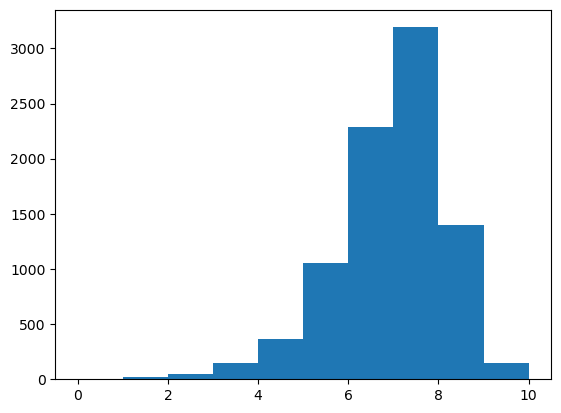

In [78]:
plt.hist(user_ratings, bins=[0,1,2,3,4,5,6,7,8,9,10])
# 7-8 is the most common bin but anywhere from 5-9 is pretty common

In [79]:
year_counts = action_video_games['Year'].value_counts()
year_counts.values

array([304, 296, 292, 278, 277, 273, 273, 272, 270, 260, 259, 254, 253,
       249, 248, 248, 242, 240, 240, 228, 228, 211, 209, 202, 198, 196,
       196, 180, 179, 178, 172, 165, 149, 134, 113, 108,  87,  78,  72,
        69,  68,  66,  40,  34,  18,  11,   8,   6,   4,   4,   4,   3,
         2,   1,   1,   1], dtype=int64)

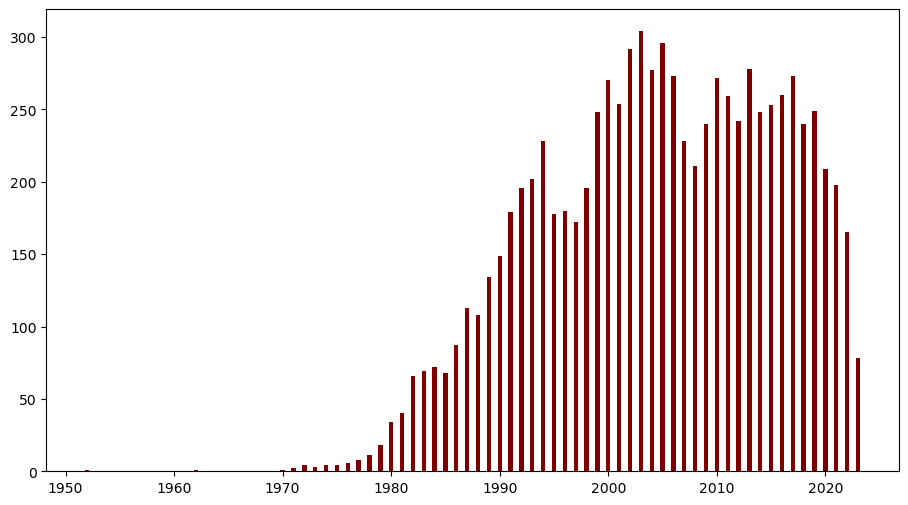

In [80]:
plt.figure(figsize=(11, 6))
plt.bar(year_counts.index, year_counts.values, color ='maroon',
        width = 0.4)
plt.show()
# seems to climb up until about the year 2000 but the number of rated action games does appear to have dropped in recent years
# (worth noting 2023 is not complete as of the time of this analysis so I am ignoring it here)

In [81]:
action_video_games['Genre'] = action_video_games['Genre'].str.split(', ')
action_video_games['Genre']

0        [Action, Adventure, Fantasy]
1          [Action, Adventure, Drama]
2          [Action, Adventure, Crime]
3         [Action, Adventure, Sci-Fi]
4          [Action, Adventure, Drama]
                     ...             
14625                 [Action, Sport]
14632                        [Action]
14636               [Action, Fantasy]
14646             [Action, Adventure]
14654                [Action, Sci-Fi]
Name: Genre, Length: 8651, dtype: object

In [82]:
genres = action_video_games['Genre'].explode().value_counts()
genres
# these are all the categories

Action       8651
Adventure    4565
Fantasy      2067
Sci-Fi       1628
Comedy        725
Family        725
Crime         495
Drama         422
Horror        361
Sport         333
War           310
Thriller      216
Mystery       189
Animation     176
History        84
Western        38
Music          30
Romance         9
Short           9
Game-Show       8
Musical         4
Name: Genre, dtype: int64

In [83]:
popular_genres = genres[genres.values>100]
popular_genres

Action       8651
Adventure    4565
Fantasy      2067
Sci-Fi       1628
Comedy        725
Family        725
Crime         495
Drama         422
Horror        361
Sport         333
War           310
Thriller      216
Mystery       189
Animation     176
Name: Genre, dtype: int64

In [86]:
genre_list = popular_genres.index[1:]
genre_list
# remove the first element since the whole dataset is action games

Index(['Adventure', 'Fantasy', 'Sci-Fi', 'Comedy', 'Family', 'Crime', 'Drama',
       'Horror', 'Sport', 'War', 'Thriller', 'Mystery', 'Animation'],
      dtype='object')

In [104]:
for genre in genre_list:
    action_video_games[genre] = action_video_games.Genre.apply(lambda x: genre in x)
action_video_games
# now each popular genre has its own column

,Popularity,Title,Genre,User Rating,Number of Votes,Year,Summary,Director,Stars,Certificate,...,Comedy,Family,Crime,Drama,Horror,Sport,War,Thriller,Mystery,Animation
0,0,Baldur's Gate III,"[Action, Adventure, Fantasy]",9.8,"1,130",2023.0,Return to the Faerun in a tale of fellowship a...,"Swen Vincke,","Amelia Tyler, Neil Newbon, Jennifer English, D...",M,...,False,False,False,False,False,False,False,False,False,False
1,1,Starfield,"[Action, Adventure, Drama]",8.7,524,2023.0,"Set 300 years in the future, the player will a...","Todd Howard,","Sumalee Montano, Damien C. Haas, Barry Wiggins...",M,...,False,False,False,True,False,False,False,False,False,False
2,2,Red Dead Redemption II,"[Action, Adventure, Crime]",9.7,"47,844",2018.0,Amidst the decline of the Wild West at the tur...,NaN,"Benjamin Byron Davis, Roger Clark, Rob Wiethof...",M,...,False,False,True,False,False,False,False,False,False,False
3,3,Armored Core VI: Fires of Rubicon,"[Action, Adventure, Sci-Fi]",7.9,114,2023.0,Fifty years after a cataclysm caused by a subs...,"Masaru Yamamura, Kenneth Kin Yue Chan, Hidetak...","Fairouz Ai, Takayuki Sakazume, Megumi Han, Aya...",T,...,False,False,False,False,False,False,False,False,False,False
4,4,The Quarry,"[Action, Adventure, Drama]",8.0,"4,625",2022.0,When the sun goes down on the last night of su...,"Will Byles,","Siobhan Williams, Skyler Gisondo, Ted Raimi, G...",M,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,14625,F1 Career Challenge,"[Action, Sport]",5.3,14,2003.0,Start as a rookie and fight for a place alongs...,NaN,NaN,E,...,False,False,False,False,False,True,False,False,False,False
14632,14632,Super Cars II,[Action],8.4,10,1991.0,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
14636,14636,Has-Been Heroes,"[Action, Fantasy]",4.2,11,2017.0,A young boy joins a group of former heroes in ...,NaN,NaN,E10+,...,False,False,False,False,False,False,False,False,False,False
14646,14646,Söldner: Secret Wars,"[Action, Adventure]",4.2,15,2004.0,Söldner: Secret Wars is similar to the recent ...,"Teut Weidemann,","Gerhard Acktun, Andreas Borcherding, David Cot...",NaN,...,False,False,False,False,False,False,False,False,False,False


In [118]:
# See how well we can predict user rating using year, certificate and genre information
X= action_video_games[['Year', 'Certificate', 'Adventure', 'Fantasy', 'Sci-Fi', 'Comedy', 'Family', 'Crime', 'Drama',
                     'Horror', 'Sport', 'War', 'Thriller', 'Mystery', 'Animation']]
X = pd.get_dummies(X, columns = ['Certificate'])
y= action_video_games['User Rating']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

# Linear Regression

In [119]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [128]:
coefficients = pd.DataFrame(zip(X.columns, classifier.coef_))
coefficients

,0,1
0,Year,4.656321e-03
1,Adventure,4.125286e-01
2,Fantasy,3.485353e-01
3,Sci-Fi,1.630368e-01
4,Comedy,1.478308e-01
5,Family,1.162780e-01
6,Crime,1.874841e-01
7,Drama,7.399255e-01
8,Horror,2.011254e-01
9,Sport,2.293049e-01


In [122]:
y_pred = classifier.predict(X_test)

In [125]:
# https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [126]:
regression_results(y_test, y_pred)
# year, genre, and certificates only explains 13% of the variance in rating

explained_variance:  0.1336
mean_squared_log_error:  0.0277
r2:  0.1334
MAE:  0.8612
MSE:  1.295
RMSE:  1.138


# Random Forest

In [129]:
# Fitting Random Forest Regression to the dataset
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [130]:
y_pred = regressor.predict(X_test)

In [131]:
regression_results(y_test, y_pred)
# random forest doesn't perform well at all

explained_variance:  -0.0029
mean_squared_log_error:  0.0311
r2:  -0.0035
MAE:  0.9248
MSE:  1.4996
RMSE:  1.2246


In [136]:
action_video_games['Summary'].fillna('')

0        Return to the Faerun in a tale of fellowship a...
1        Set 300 years in the future, the player will a...
2        Amidst the decline of the Wild West at the tur...
3        Fifty years after a cataclysm caused by a subs...
4        When the sun goes down on the last night of su...
                               ...                        
14625    Start as a rookie and fight for a place alongs...
14632                                                     
14636    A young boy joins a group of former heroes in ...
14646    Söldner: Secret Wars is similar to the recent ...
14654                                                     
Name: Summary, Length: 8651, dtype: object

# NLP

In [138]:
# Let's try to predict user rating using the summary
X= action_video_games['Summary'].fillna('')
y= action_video_games['User Rating']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

In [139]:
X_train

6811    Return to the epic world of Nano Kingdoms, to ...
3322                                                     
6527    Sega Mega Drive game revolving around Michael ...
5677                                                     
4750    Ashley and the ARMS team must fight against a ...
                              ...                        
6413    Immerse yourself in the first person on rails ...
5685    A swordsman and a sorceress embark on a quest ...
5949    It's been two years since the invading alien m...
897     The world has been thrown into chaos by an anc...
9175                                                     
Name: Summary, Length: 6488, dtype: object

In [140]:
results = set()
X_train.str.lower().str.split().apply(results.update)
len(results)
# 25,743 unique words

25743

In [141]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [142]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

training_labels_final = np.array(y_train)
validation_labels_final = np.array(y_test)

In [144]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            64000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [145]:
num_epochs = 20
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels_final))

Epoch 1/20
203/203 [==============================] - 1s 2ms/step - loss: 37.9661 - val_loss: 25.2331
Epoch 2/20
203/203 [==============================] - 0s 1ms/step - loss: 13.6137 - val_loss: 5.4145
Epoch 3/20
203/203 [==============================] - 0s 2ms/step - loss: 3.0959 - val_loss: 2.0235
Epoch 4/20
203/203 [==============================] - 0s 1ms/step - loss: 1.7961 - val_loss: 1.6267
Epoch 5/20
203/203 [==============================] - 0s 2ms/step - loss: 1.5488 - val_loss: 1.5124
Epoch 6/20
203/203 [==============================] - 0s 2ms/step - loss: 1.4634 - val_loss: 1.4819
Epoch 7/20
203/203 [==============================] - 0s 2ms/step - loss: 1.4263 - val_loss: 1.4691
Epoch 8/20
203/203 [==============================] - 0s 2ms/step - loss: 1.3992 - val_loss: 1.4619
Epoch 9/20
203/203 [==============================] - 0s 2ms/step - loss: 1.3745 - val_loss: 1.4519
Epoch 10/20
203/203 [==============================] - 0s 2ms/step - loss: 1.3504 - val_loss: 1.4

In [147]:
y_pred = model.predict(validation_padded)
y_test = validation_labels_final

68/68 [==============================] - 0s 681us/step


In [148]:
regression_results(y_test, y_pred)
# not as good as linear regression but better than random forest

explained_variance:  0.0544
mean_squared_log_error:  0.0299
r2:  0.0531
MAE:  0.901
MSE:  1.415
RMSE:  1.1895
